## Correlation between batting speed (Exit Velocity) and the number of homeruns
- Recently, there are indicators that are commonly emphasized in batters. One of them is the speed and firing angle of the ball. To increase the angle of launch, players practice upper swing, and in MLB, most players raise their elbows high. Does hitting the ball as hard as possible and flying it as high as possible really affect the home run?

### Exit Velocity : 
Measure the speed of the ball immediately after the batter hits.
it Track all hits.
High Exit velocity have relatively little time to react to the defense, so there is a high chance of hitting.

#### Definition of Exit Velocity column 
- attempts : Number of at-bats where the batting event occurred (BBE)
- avg_hit_angle: average batting angle
- anglesweetspotpercent: Percentage of balls with a firing angle between 8 and 32 degrees
- max_hit_speed: maximum batting average
- avg_hit_speed: average batting average
- fbld (FD/LD): Average batting speed of a fly ball and a line drive
- gb: Average batting average of ground ball hits
- max_distance : longest batting distance
- avg_distance : average batting distance
- avg_hr_distance: average home run batting distance
- ev95plust: Number of hard hits (at least 95 miles)
- ev95per-swing: Hard Hit Ratio per swing
- ev95 percent: Hard Hit ratio
- Barrels: Number of times a barrel hit was made
- brl_percent : Barrel batting ratio per BBE
- brl_pa : Barrel batting ratio per at-bat

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
## ev_df : Data frames of Related Indicators
## hr_df : Data frame of recorded number of homeruns
ev_df = pd.read_csv('exit_velocity.csv')
hr_df = pd.read_csv('stats.csv')
ev_df.head()

,last_name,first_name,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
0,Semien,Marcus,543760,535,20.1,32.3,110.1,87.3,91.3,84.3,430,187,394.0,186,34.8,37,6.9,5.2
1,Rosario,Amed,642708,522,5.1,30.8,110.8,88.3,92.2,86.8,450,138,407.0,199,38.1,23,4.4,3.5
2,Guerrero Jr.,Vladimir,665489,520,4.1,27.9,118.4,92.7,98.0,90.2,467,143,406.0,260,50.0,58,11.2,8.3
3,Turner,Trea,607208,519,10.1,35.5,112.5,88.9,92.1,86.2,439,163,401.0,216,41.6,39,7.5,5.6
4,Ramírez,José,608070,516,20.7,33.7,114.2,87.6,91.1,86.8,422,180,392.0,191,37.0,34,6.6,5.1


In [28]:
ev_df.head()

,last_name,first_name,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
0,Semien,Marcus,543760,535,20.1,32.3,110.1,87.3,91.3,84.3,430,187,394.0,186,34.8,37,6.9,5.2
1,Rosario,Amed,642708,522,5.1,30.8,110.8,88.3,92.2,86.8,450,138,407.0,199,38.1,23,4.4,3.5
2,Guerrero Jr.,Vladimir,665489,520,4.1,27.9,118.4,92.7,98.0,90.2,467,143,406.0,260,50.0,58,11.2,8.3
3,Turner,Trea,607208,519,10.1,35.5,112.5,88.9,92.1,86.2,439,163,401.0,216,41.6,39,7.5,5.6
4,Ramírez,José,608070,516,20.7,33.7,114.2,87.6,91.1,86.8,422,180,392.0,191,37.0,34,6.6,5.1


In [30]:
hr_df.head()

,last_name,first_name,player_id,year,b_home_run,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 13
0,Cruz Jr.,Nelson,443558,2022,10,0.241,0.399,0.320,0.323,0.157,90.9,7.2,9.3,NaN
1,Blackmon,Charlie,453568,2022,16,0.256,0.376,0.301,0.308,0.120,86.2,12.4,4.4,NaN
2,McCutchen,Andrew,457705,2022,17,0.252,0.406,0.323,0.327,0.154,89.1,13.2,8.7,NaN
3,Turner,Justin,457759,2022,13,0.270,0.431,0.342,0.346,0.161,89.5,18.4,8.1,NaN
4,Andrus,Elvis,462101,2022,16,0.244,0.356,0.291,0.300,0.111,87.9,12.1,4.4,NaN


In [29]:
ev_df.describe()

,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,248.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,610641.848000,349.412000,12.610400,33.583200,111.250800,88.977200,93.078400,85.999600,433.728000,164.260000,397.512097,139.496000,40.008800,28.184000,8.198800,5.491600
std,61225.197339,81.526662,4.702914,3.541623,2.728376,2.065786,2.396218,2.599343,18.503609,18.170334,10.452895,41.122039,6.928157,15.169661,4.086185,2.417101
min,405395.000000,183.000000,-1.500000,24.300000,103.200000,83.800000,84.400000,73.700000,388.000000,115.000000,344.000000,64.000000,14.900000,2.000000,0.500000,0.400000
25%,572457.500000,283.000000,9.825000,31.200000,109.500000,87.600000,91.425000,84.325000,422.000000,152.250000,392.000000,105.250000,35.375000,17.000000,5.100000,3.800000
50%,622983.000000,345.000000,12.450000,33.450000,111.050000,88.900000,93.050000,85.900000,433.000000,164.000000,398.000000,132.500000,39.900000,26.000000,7.750000,5.250000
75%,663720.250000,414.500000,15.675000,36.000000,112.700000,90.275000,94.600000,87.500000,444.000000,177.000000,404.250000,169.000000,45.025000,37.000000,10.700000,7.100000
max,683734.000000,535.000000,24.600000,43.500000,122.400000,96.000000,100.400000,94.400000,504.000000,220.000000,428.000000,260.000000,61.900000,106.000000,27.100000,15.500000


In [12]:
hr_df.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'b_home_run', 'xba',
       'xslg', 'xwoba', 'xobp', 'xiso', 'exit_velocity_avg',
       'launch_angle_avg', 'barrel_batted_rate', 'Unnamed: 13'],
      dtype='object')

In [9]:
print(ev_df.columns, hr_df.columns)

Index(['last_name', ' first_name', 'player_id', 'attempts', 'avg_hit_angle',
       'anglesweetspotpercent', 'max_hit_speed', 'avg_hit_speed', 'fbld', 'gb',
       'max_distance', 'avg_distance', 'avg_hr_distance', 'ev95plus',
       'ev95percent', 'barrels', 'brl_percent', 'brl_pa'],
      dtype='object') Index(['last_name', ' first_name', 'player_id', 'year', 'b_home_run', 'xba',
       'xslg', 'xwoba', 'xobp', 'xiso', 'exit_velocity_avg',
       'launch_angle_avg', 'barrel_batted_rate', 'Unnamed: 13'],
      dtype='object')


In [13]:
## drop columns for merge (player_id, b_home_run)
hr_df = hr_df.drop(['last_name', ' first_name', 'year', 'xba',
       'xslg', 'xwoba', 'xobp', 'xiso', 'exit_velocity_avg',
       'launch_angle_avg', 'barrel_batted_rate', 'Unnamed: 13'], axis=1)
hr_df.columns

Index(['player_id', 'b_home_run'], dtype='object')

In [14]:
hr_df.columns

Index(['player_id', 'b_home_run'], dtype='object')

In [15]:
hr_df.head()

,player_id,b_home_run
0,443558,10
1,453568,16
2,457705,17
3,457759,13
4,462101,16


In [17]:
ev_hr = pd.merge(ev_df, hr_df, how = 'outer', on='player_id')
ev_hr.head()

,last_name,first_name,player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa,b_home_run
0,Semien,Marcus,543760,535,20.1,32.3,110.1,87.3,91.3,84.3,430,187,394.0,186,34.8,37,6.9,5.2,26.0
1,Rosario,Amed,642708,522,5.1,30.8,110.8,88.3,92.2,86.8,450,138,407.0,199,38.1,23,4.4,3.5,11.0
2,Guerrero Jr.,Vladimir,665489,520,4.1,27.9,118.4,92.7,98.0,90.2,467,143,406.0,260,50.0,58,11.2,8.3,31.0
3,Turner,Trea,607208,519,10.1,35.5,112.5,88.9,92.1,86.2,439,163,401.0,216,41.6,39,7.5,5.6,20.0
4,Ramírez,José,608070,516,20.7,33.7,114.2,87.6,91.1,86.8,422,180,392.0,191,37.0,34,6.6,5.1,29.0


In [20]:
ev_hr = ev_hr.dropna()

In [21]:
## change player_id datatype to avoid being included in the correlation analysis
ev_hr['player_id'] = ev_hr['player_id'].astype({'player_id' : 'str'})
ev_hr.dtypes

last_name                 object
 first_name               object
player_id                 object
attempts                   int64
avg_hit_angle            float64
anglesweetspotpercent    float64
max_hit_speed            float64
avg_hit_speed            float64
fbld                     float64
gb                       float64
max_distance               int64
avg_distance               int64
avg_hr_distance          float64
ev95plus                   int64
ev95percent              float64
barrels                    int64
brl_percent              float64
brl_pa                   float64
b_home_run               float64
dtype: object

### Correlation analysis
- The correlation coefficient between EV indicators and the number of home runs
- Show only those with a correlation coefficient of 0.4 or higher on the heat map
- Indicators associated with Barrels(brl) (perfect combination of batting speed and shooting angle) show a high correlation
- fbld (fly ball and line drive ball speed), ev95percent (ratio of ball speed over 95 miles), are also noteworthy

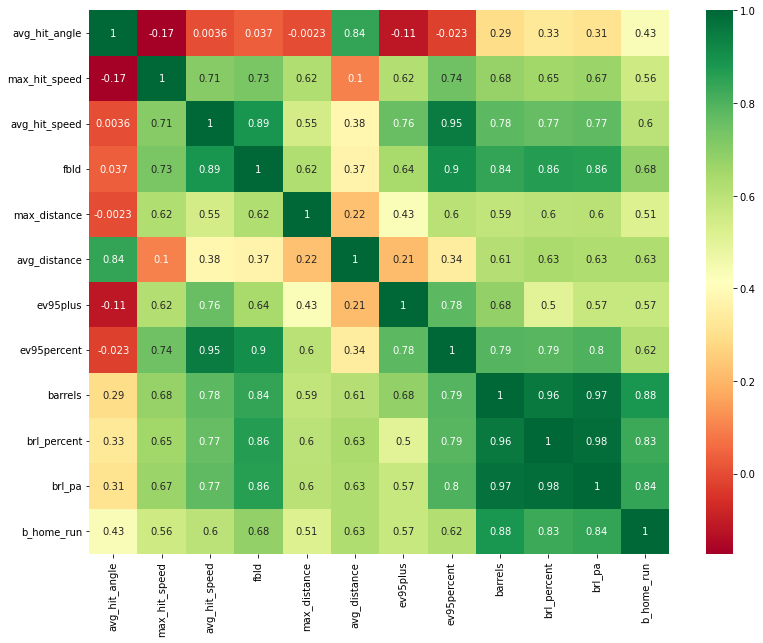

In [22]:
corrmat = ev_hr.corr()
corr_columns = corrmat.index[abs(corrmat["b_home_run"])>=0.4]
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(ev_hr[corr_columns].corr(), annot=True, cmap="RdYlGn")